In [1]:
import xlrd 
import numpy as np
import matplotlib.pylab as pylab
import matplotlib
from matplotlib import pyplot as plt 
file = 'sms_400us_poe.xlsx'
data = xlrd.open_workbook(file)
table = data.sheet_by_name('Summary')
FIG_DIR = "C:/Users/dx/Desktop/ASPLOS/FIG/"



DMCidle = np.array(table.col_values(15)[1:]).reshape(12,22)


In [2]:
rp_labels = ['SRRIP','SPDP','WRPDP','DRRIP','DIP']
pf_labels = ['PSF','None','BO']
ds_labels = ['Onmyoji','Honor of Kings','UC Browser','QQ Speed Mobile','NBA 2K19','Knives Out','Fortnite','TikTok','Identity V','PUBG Mobile','honkai impact 3','Cross Fire Mobile']

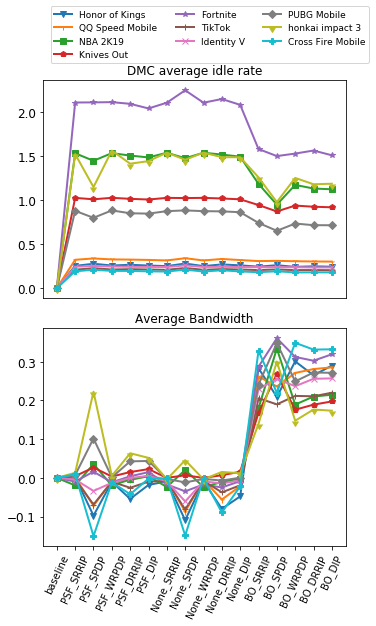

In [3]:
## DMC average idle rate, Average Bandwidth

params = {
            'axes.labelsize': '16',
            'xtick.labelsize': '10',
            'ytick.labelsize': '12',
            'lines.linewidth': '2',
            'legend.fontsize': '14',
            'figure.figsize': '5, 8'  # set figure size
        }
pylab.rcParams.update(params)

col = [4,10,15]
labels = ['baseline']
titles = ["DMC average idle rate","Average Bandwidth","Power Reduction"]
markers = ['.','v','^','1','s','p','*','+','x','D',matplotlib.markers.CARETDOWNBASE,'P',',','h']
for i in range(15):
    labels.append(pf_labels[int(i/5)] + '_' + rp_labels[int(i%5)])
###################################
# a=np.array(table.col_values(15)[1:]).reshape(12,22)
# b = a[:,1]

# for i in range(12):
#     a[i]=a[i] - b[i]


###################################
j=0
fig, axs = plt.subplots(nrows=2, ncols=1)
for ax in axs:
    DMCidle = np.array(table.col_values(col[j])[1:]).reshape(12,22)
    DMCidle = np.concatenate(( DMCidle[:,0:7], DMCidle[:,12:22]), axis=1) 
    baseline = DMCidle[:,1]
  #  print(DMCidle)
    for i in range(12):
        DMCidle[i]=(DMCidle[i] - baseline[i])/baseline[i]
    for i in range(12):
        if(i!=0 and i!=2 ):
            ax.plot(labels, DMCidle[i,1:], label= ds_labels[i],marker = markers[i])   
    ax.set_title(titles[j])
    if(j==1):
        ax.set_xticks(np.arange(len(labels)))
        ax.set_xticklabels(labels)
        #plt.xticks(rotation=90) 
        for xtick in ax.get_xticklabels():
            xtick.set_rotation(65)
    else:
        ax.set_xticks([])   
    j=j+1
fig.tight_layout()

ax.legend(bbox_to_anchor=(0.01,2.5),loc=2,prop={'size':9}, ncol=3) #  
plt.show()


In [5]:
# pa = np.array(table.col_values(14)[5:320:22])
# pa = np.concatenate((pa[:], pa[:]), axis=1) 
# print(pa)

# params = {
#             'axes.labelsize': '16',
#             'xtick.labelsize': '10',
#             'ytick.labelsize': '12',
#             'lines.linewidth': '2',
#             'legend.fontsize': '12',
#             'figure.figsize': '6, 3'  # set figure size
#         }
# pylab.rcParams.update(params)

# for x,y in enumerate(pa):
#     plt.text(x, y , np.around(y, 2), ha='center', va='bottom')

# ax = plt.bar(np.arange(12),pa)
# plt.xticks(np.arange(len(ds_labels)), ds_labels,rotation=50)
# plt.title('Prefetch Accuracy')
# plt.ylim(0.6,1)
# plt.yticks((0.6,0.7,0.8,0.9,1.0), ('60%', '70%', '80%', '90%', '100%'))
# #plt.tight_layout()
# plt.show()

IndexError: list index out of range

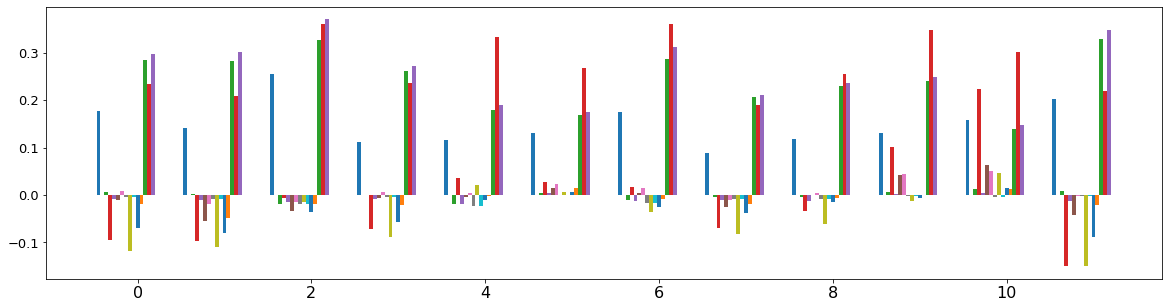

In [6]:


# params = {
#             'axes.labelsize': '16',
#             'xtick.labelsize': '16',
#             'ytick.labelsize': '13',
#             'lines.linewidth': '2',
#             'legend.fontsize': '20',
#             'figure.figsize': '20, 5'  # set figure size
#         }
# pylab.rcParams.update(params)
# x = np.arange(len(ds_labels))
# width =0.9
# rects={}
# fig, ax = plt.subplots()

# for i in range(20):  
#     rects[i] =  ax.bar(x + i* width/20 - width/2, DMCidle[:,i], width/20, label=  pf_labels[int(i/5)]  +'_'+ rp_labels[int(i%5)]) 
#     #print(DMCidle[:,i])
    
#     # Add some text for labels, title and custom x-axis tick labels, etc.
# ax.set_ylabel('Scores')
# ax.set_title('Scores by group and gender')
# ax.set_xticks(x)
# ax.set_xticklabels(ds_labels)

# ax.legend(loc=5,prop={'size':9}, ncol=4) #图例

# #fig.tight_layout()

# plt.show()

In [8]:
# import numpy as np
# import matplotlib
# import matplotlib.pyplot as plt

# params = {
#             'axes.labelsize': '16',
#             'xtick.labelsize': '8',
#             'ytick.labelsize': '8',
#             'lines.linewidth': '2',
#             'legend.fontsize': '20',
#             'figure.figsize': '16, 5'  # set figure size
#         }
# pylab.rcParams.update(params)
# images = []
# fig, axs = plt.subplots(nrows=2, ncols=6)
# fig.suptitle('DMC idle rate',fontsize = 18, x=0.45,y=1.05)
# k=0
# for ax in axs.flat:
#     set = DMCidle[k,2:].reshape(4,5)
#     images.append( ax.imshow(set))
#     # We want to show all ticks...
    
    
#     # ... and label them with the respective list entries
#     if(k> 5):
#         ax.set_xticks(np.arange(len(rp_labels)))
#         ax.set_xticklabels(rp_labels)
#     else:
#         ax.set_xticks([])
        
#     if(k==0 or k == 6):
#         ax.set_yticks(np.arange(len(pf_labels)))
#         ax.set_yticklabels(pf_labels)
#     else:
#         ax.set_yticks([])

#     # Rotate the tick labels and set their alignment.
#     plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
#              rotation_mode="anchor")

#     # Loop over data dimensions and create text annotations.
#     for i in range(len(pf_labels)):
#         for j in range(len(rp_labels)):
#             text = ax.text(j, i,np.around(set[i][j], 2)  ,
#                            ha="center", va="center", color="w")
#     ax.set_title(ds_labels[k])
#     fig.tight_layout()
#     k=k+1

# plt.colorbar(images[0], ax=axs, fraction=.1)
# plt.show()


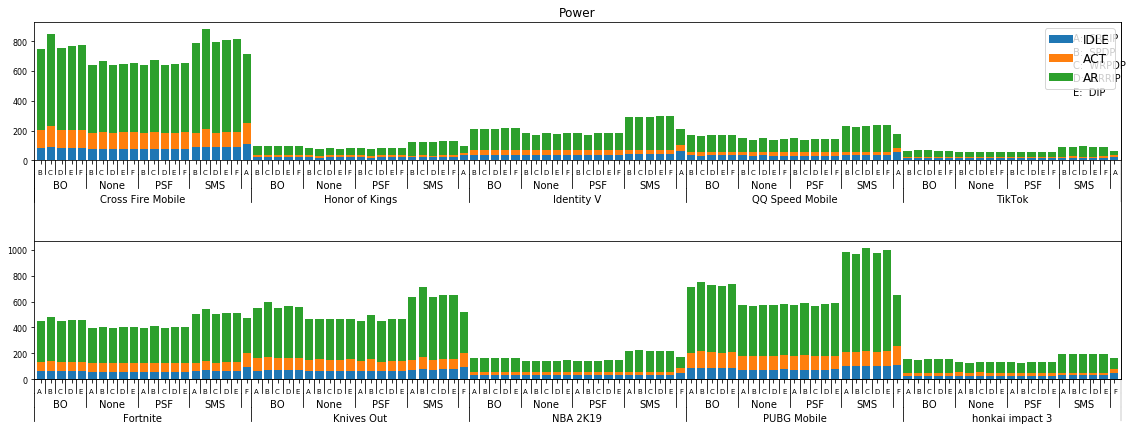

In [9]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from itertools import groupby
params = {
#             'axes.labelsize': '16',
#             'xtick.labelsize': '8',
#             'ytick.labelsize': '8',
#             'lines.linewidth': '2',
             'legend.fontsize': '12',
            'figure.figsize': '16, 6.5'  # set figure size
        }
pylab.rcParams.update(params)

D = np.array(table.col_values(3)[1:]).reshape(12,22)
F  = np.array(table.col_values(5)[1:]).reshape(12,22)
X =np.array(table.col_values(23)[1:]).reshape(12,22)
AA = np.array(table.col_values(26)[1:]).reshape(12,22)
K =np.array(table.col_values(10)[1:]).reshape(12,22)
idle = D*20 + F*109
act = (X/(AA/1.2/1000000000))/10000000*20.98
ar = K*70
power = idle + act + ar

def test_table():
    data_table = pd.DataFrame({'Workload': ['Honor of Kings']*21+ ['QQ Speed Mobile']*21+['TikTok']*21
                               + ['Identity V']*21+['Cross Fire Mobile']*21,
                               'Prefetcher':(['baseline'] + ['PSF']*5 + ['SMS']*5 +['None']*5 + ['BO']*5)*5,
                               'ReplacePolicy':(['A'] + ['B','C','D','E','F'] * 4)*5,
                               'IDLE':idle[0:5,1:].reshape(1,105).flatten(),
                               'ACT':act[0:5,1:].reshape(1,105).flatten(),
                               'AR':ar[0:5,1:].reshape(1,105).flatten()
                               })
    return data_table

def test_table1():
    data_table = pd.DataFrame({'Workload': ['Fortnite']*21+ ['PUBG Mobile']*21+ ['honkai impact 3']*21
                                +  ['NBA 2K19']*21+ ['Knives Out']*21,
                               'Prefetcher':(['baseline'] +['PSF']*5 + ['SMS']*5 +['None']*5 + ['BO']*5)*5,
                               'ReplacePolicy':(['F'] +['A','B','C','D','E'] * 4)*5,
                               'IDLE':idle[5:10,1:].reshape(1,105).flatten(),
                               'ACT':act[5:10,1:].reshape(1,105).flatten(),
                               'AR':ar[5:10,1:].reshape(1,105).flatten()
                               })
    return data_table

def add_line(ax, xpos, ypos,width):
    line = plt.Line2D([xpos, xpos], [ypos + .1, ypos],
                      transform=ax.transAxes, color='black',linewidth=width)
    line.set_clip_on(False)
    ax.add_line(line)

def label_len(my_index,level):
    labels = my_index.get_level_values(level)
    return [(k, sum(1 for i in g)) for k,g in groupby(labels)]

def label_group_bar_table(ax, df):
    ypos = -.1
    linewidth = 0.8
    scale = 1./df.index.size
    for level in range(df.index.nlevels)[::-1]:
        pos = 0
        for label, rpos in label_len(df.index,level):
            lxpos = (pos + .5 * rpos)*scale
            if(rpos == 1):
                if(label!='baseline'):
                    ax.text(lxpos, ypos, label, ha='center', transform=ax.transAxes,fontsize=7)#,rotation='vertical'
            else:
                ax.text(lxpos, ypos, label, ha='center', transform=ax.transAxes)#,rotation='vertical'
            add_line(ax, pos*scale, ypos,linewidth)
            pos += rpos
        add_line(ax, pos*scale , ypos,0.2)
        ypos -= .1

df = test_table().groupby(['Workload','Prefetcher','ReplacePolicy']).sum()
#print(df)
fig = plt.figure()
plt.yticks([])  
plt.xticks([]) 
plt.title('Power')

ax = fig.add_subplot(211)
df.plot(kind='bar',stacked=True,ax=fig.gca(),width=0.8)#x + i* width/20 - width/2
plt.text(100, 800, 'A:  SRRIP')
plt.text(100, 710, 'B:  SPDP')
plt.text(100, 620, 'C:  WRPDP')
plt.text(100, 530, 'D:  DRRIP')
plt.text(100, 440, 'E:  DIP')
#Below 3 lines remove default labels
labels = ['' for item in ax.get_xticklabels()]
ax.set_xticklabels(labels)
ax.set_xlabel('')
label_group_bar_table(ax, df)
fig.subplots_adjust(bottom=.1*df.index.nlevels)
plt.subplots_adjust( hspace=-0.8)
ax1 = fig.add_subplot(212)
df1 = test_table1().groupby(['Workload','Prefetcher','ReplacePolicy']).sum()
df1.plot(kind='bar',stacked=True,ax=fig.gca(),width=0.8,legend =False)#x + i* width/20 - width/2
#Below 3 lines remove default labels
labels = ['' for item in ax1.get_xticklabels()]
ax1.set_xticklabels(labels)
ax1.set_xlabel('')
label_group_bar_table(ax1, df1)
fig.subplots_adjust(bottom=.1*df1.index.nlevels)
fig.tight_layout()
plt.show()


In [10]:
def test_table1():
    data_table = pd.DataFrame({'Workload':['Fortnite']*20 + ['TikTok']*20+ ['Identity V']*20
                               + ['PUBG Mobile']*20+ ['honkai impact 3']*20+ ['Cross Fire Mobile']*20,
                               'Prefetcher':(['PSF']*5 + ['SMS']*5 +['None']*5 + ['BO']*5)*6,
                               'ReplacePolicy':['SRRIP','SPDP','WRPDP','DRRIP','DIP']*24,
                               'IDLE':idle[6:12,2:].reshape(1,120).flatten(),
                               'ACT':act[6:12,2:].reshape(1,120).flatten(),
                               'AR':ar[6:12,2:].reshape(1,120).flatten()
                               })
    return data_table
def add_line(ax, xpos, ypos):
    line = plt.Line2D([xpos, xpos], [ypos + .1, ypos],
                      transform=ax.transAxes, color='black')
    line.set_clip_on(False)
    ax.add_line(line)

def label_len(my_index,level):
    labels = my_index.get_level_values(level)
    return [(k, sum(1 for i in g)) for k,g in groupby(labels)]

def label_group_bar_table(ax, df):
    ypos = -.1
    scale = 1./df.index.size
    for level in range(df.index.nlevels)[::-1]:
        pos = 0
        for label, rpos in label_len(df.index,level):
            lxpos = (pos + .5 * rpos)*scale
            if(rpos == 1):
                ax.text(lxpos, ypos, label, ha='center', transform=ax.transAxes,rotation='vertical',fontsize=7)#,rotation='vertical'
            else:
                ax.text(lxpos, ypos, label, ha='center', transform=ax.transAxes)#,rotation='vertical'
            add_line(ax, pos*scale, ypos)
            pos += rpos
        add_line(ax, pos*scale , ypos)
        ypos -= .1
df1 = test_table1().groupby(['Workload','Prefetcher','ReplacePolicy']).sum()

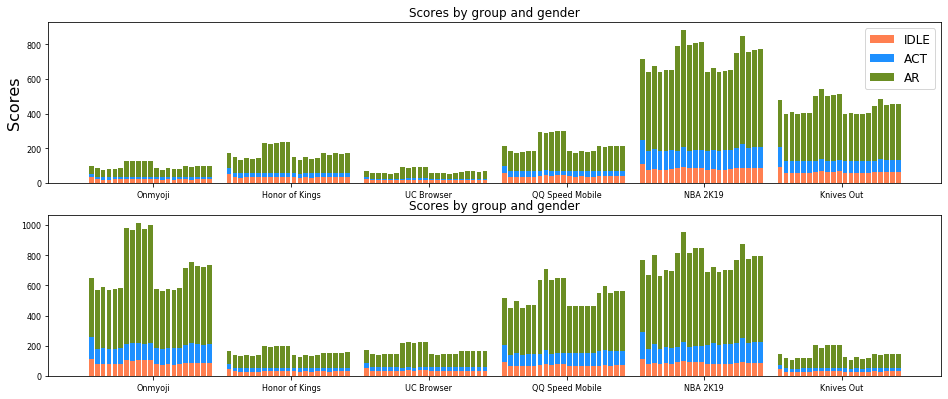

In [11]:
params = {
#             'axes.labelsize': '16',
#             'xtick.labelsize': '8',
#             'ytick.labelsize': '8',
#             'lines.linewidth': '2',
             'legend.fontsize': '12',
            'figure.figsize': '16, 6.5'  # set figure size
        }
pylab.rcParams.update(params)

D = np.array(table.col_values(3)[1:]).reshape(12,22)
F  = np.array(table.col_values(5)[1:]).reshape(12,22)
X =np.array(table.col_values(23)[1:]).reshape(12,22)
AA = np.array(table.col_values(26)[1:]).reshape(12,22)
K =np.array(table.col_values(10)[1:]).reshape(12,22)
idle = D*20 + F*109
act = (X/(AA/1.2/1000000000))/10000000*20.98
ar = K*70
power = idle + act + ar

x = np.arange(len(ds_labels)/2)
width =0.9
rects={}
#fig, ax = plt.subplots()
fig = plt.figure()
ax = fig.add_subplot(211)
idle = idle[:,1:].reshape(12,21)
act = act[:,1:].reshape(12,21)
ar = ar[:,1:].reshape(12,21)
for i in range(21):  
    rects[i] =  ax.bar(x + i* width/21 - width/2, idle[0:6,i], width/26, color = 'coral')#label=  pf_labels[int(i/5)]  +'_'+ rp_labels[int(i%5)],
    rects[i] =  ax.bar(x + i* width/21 - width/2, act[0:6,i], width/26,  bottom= idle[0:6,i],color = 'dodgerblue')#,color = 'g'
    rects[i] =  ax.bar(x + i* width/21 - width/2, ar[0:6,i], width/26,   bottom= act[0:6,i]+idle[0:6,i], color = 'Olivedrab')#, color = 'b'
    
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(ds_labels)
ax.legend(["IDLE","ACT","AR"])
#ax.legend(loc=5,prop={'size':9}, ncol=4) #图例
ax = fig.add_subplot(212)
for i in range(21):  
    rects[i] =  ax.bar(x + i* width/21 - width/2, idle[6:12,i], width/26, color = 'coral')#label=  pf_labels[int(i/5)]  +'_'+ rp_labels[int(i%5)],
    rects[i] =  ax.bar(x + i* width/21 - width/2, act[6:12,i], width/26,  bottom= idle[6:12,i],color = 'dodgerblue')#,color = 'g'
    rects[i] =  ax.bar(x + i* width/21 - width/2, ar[6:12,i], width/26,   bottom= act[6:12,i]+idle[6:12,i], color = 'Olivedrab')#, color = 'b'
    
#ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(ds_labels)

#fig.tight_layout()

plt.show()

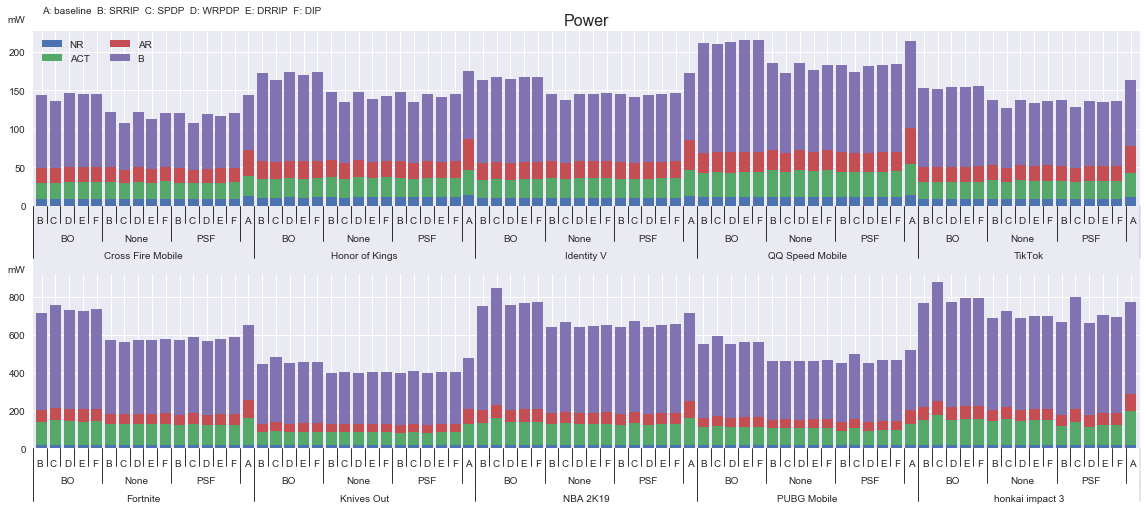

In [12]:
##Figure 10: Power
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from itertools import groupby
params = {
            'axes.labelsize': '10',
            'xtick.labelsize': '10',
            'ytick.labelsize': '10',
#             'lines.linewidth': '2',
             'legend.fontsize': '12',
            'figure.figsize': '16, 7.5'  # set figure size
        }
pylab.rcParams.update(params)

D = np.array(table.col_values(3)[1:]).reshape(12,22)
F  = np.array(table.col_values(5)[1:]).reshape(12,22)
X =np.array(table.col_values(23)[1:]).reshape(12,22)
AA = np.array(table.col_values(26)[1:]).reshape(12,22)
K =np.array(table.col_values(10)[1:]).reshape(12,22)
nr = D*20 
ar = F*109
act = (X/(AA/1.2/1000000000))/10000000*20.98
b = K*70
power = nr + act + ar +b

def test_table_all():
    data_table = pd.DataFrame({'Workload':['Onmyoji']*21 + ['Honor of Kings']*21+ ['UC Browser']*21
                               + ['QQ Speed Mobile']*21+ ['NBA 2K19']*21+ ['Knives Out']*21,
                               'Prefetcher':(['baseline'] + ['PSF']*5 + ['SMS']*5 +['None']*5 + ['BO']*5)*6,
                               'ReplacePolicy':(['A'] + ['B','C','D','E','F'] * 4)*6,
                               'NR':nr[0:6,1:].reshape(1,126).flatten(),
                               'ACT':act[0:6,1:].reshape(1,126).flatten(),
                               'AR':ar[0:6,1:].reshape(1,126).flatten(),
                               'B' :b[0:6,1:].reshape(1,126).flatten()
                               
                               })
    data_table2 = pd.DataFrame({'Workload':['Fortnite']*21 + ['TikTok']*21+ ['Identity V']*21
                               + ['PUBG Mobile']*21+ ['honkai impact 3']*21+ ['Cross Fire Mobile']*21,
                               'Prefetcher':(['baseline'] + ['PSF']*5 + ['SMS']*5 +['None']*5 + ['BO']*5)*6,
                               'ReplacePolicy':(['A'] + ['B','C','D','E','F'] * 4)*6,
                               'NR':nr[6:12,1:].reshape(1,126).flatten(),
                               'ACT':act[6:12,1:].reshape(1,126).flatten(),
                               'AR':ar[6:12,1:].reshape(1,126).flatten(),
                                'B' :b[6:12,1:].reshape(1,126).flatten()
                               })
    return pd.concat([data_table, data_table2])

def test_table():
    data_table = test_table_all()
    data_table = data_table[data_table['Workload'].isin(['Honor of Kings','QQ Speed Mobile','TikTok','Identity V','Cross Fire Mobile'])]
    data_table = data_table[~data_table['Prefetcher'].isin(['SMS'])]
    return data_table

def test_table1():
    data_table = test_table_all()
    data_table = data_table[data_table['Workload'].isin(['NBA 2K19','Knives Out','Fortnite','PUBG Mobile','honkai impact 3'])]
    data_table = data_table[~data_table['Prefetcher'].isin(['SMS'])]
    return data_table

def add_line(ax, xpos, ypos,width):
    line = plt.Line2D([xpos, xpos], [ypos + .1, ypos],
                      transform=ax.transAxes, color='black',linewidth=width)
    line.set_clip_on(False)
    ax.add_line(line)

def label_len(my_index,level):
    labels = my_index.get_level_values(level)
    return [(k, sum(1 for i in g)) for k,g in groupby(labels)]

def label_group_bar_table(ax, df):
    ypos = -.1
    linewidth = 0.8
    scale = 1./df.index.size
    for level in range(df.index.nlevels)[::-1]:
        pos = 0
        for label, rpos in label_len(df.index,level):
            lxpos = (pos + .5 * rpos)*scale
            if(rpos == 1):
                if(label!='baseline'):
                    ax.text(lxpos, ypos, label, ha='center', transform=ax.transAxes,fontsize=10)#,rotation='vertical'
            else:
                ax.text(lxpos, ypos, label, ha='center', transform=ax.transAxes)#,rotation='vertical'
            add_line(ax, pos*scale, ypos,linewidth)
            pos += rpos
        add_line(ax, pos*scale , ypos,0.2)
        ypos -= .1

df = test_table().groupby(['Workload','Prefetcher','ReplacePolicy']).sum()
#print(df)
 
fig = plt.figure()
#plt.style.context('grayscale', after_reset=True)
plt.style.use('seaborn');
#plt.style.use('bmh') 
plt.yticks([])  
plt.xticks([]) 
plt.title('Power',fontsize=16)


ax = fig.add_subplot(211)
df.plot(kind='bar',stacked=True,ax=fig.gca(),width=0.8)#x + i* width/20 - width/2
plt.text(0, 250, 'A: baseline  B: SRRIP  C: SPDP  D: WRPDP  E: DRRIP  F: DIP',fontsize=10) #330
plt.text(-0.015, 1.05, 'mW' , ha='center', transform=ax.transAxes,fontsize=10)
#Below 3 lines remove default labels
labels = ['' for item in ax.get_xticklabels()]
ax.set_xticklabels(labels)
ax.set_xlabel('')
label_group_bar_table(ax, df)
fig.subplots_adjust(bottom=.1*df.index.nlevels)
plt.subplots_adjust( hspace=-0.3)

ax1 = fig.add_subplot(212)
df1 = test_table1().groupby(['Workload','Prefetcher','ReplacePolicy']).sum()
df1.plot(kind='bar',stacked=True,ax=fig.gca(),width=0.8,legend =False)#x + i* width/20 - width/2

#Below 3 lines remove default labels
labels = ['' for item in ax1.get_xticklabels()]
ax1.set_xticklabels(labels)
ax1.set_xlabel('')
label_group_bar_table(ax1, df1)
fig.subplots_adjust(bottom=.1*df1.index.nlevels)
fig.tight_layout()
ax.legend(prop={'size':10},loc=2, ncol=2)
#plt.ylabel('mW',rotation=0,x=-500,y=0.95)
ax1.text(-0.015, -0.38, 'mW' , ha='center', transform=ax.transAxes,fontsize=10)
plt.savefig(FIG_DIR+'power.pdf')
plt.show()
plt.close()

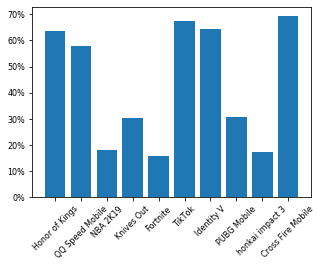

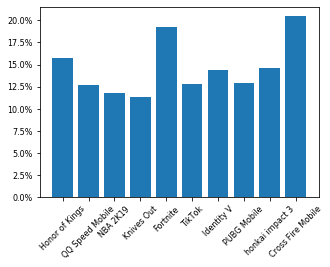

In [14]:
import pandas as pd
import matplotlib.ticker as mtick
params = {
#             'axes.labelsize': '16',
            'xtick.labelsize': '8',
            'ytick.labelsize': '8',
#             'lines.linewidth': '2',
            'legend.fontsize': '3',
            'figure.figsize': '5,3.5'  # set figure size
        }
pylab.rcParams.update(params)
summary_df = pd.read_excel(file, 'Summary')
summary_df = summary_df[(~summary_df['configuration'].str.contains('yinyangshi')) & (~summary_df['configuration'].str.contains('uc_web'))]
syscache_df = summary_df[summary_df['configuration'].str.contains("syscache64")]

_ds_label = [x for x in ds_labels if x != 'Onmyoji' and x != 'UC Browser']
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ind = list(range(syscache_df.shape[0]))
plt.bar(ind, syscache_df['DMC average idle%'],)
plt.xticks(ind, [_ds_label[idx] for idx, x in enumerate(syscache_df['configuration'])], rotation=45)
yticks = mtick.PercentFormatter(xmax=1)
ax.yaxis.set_major_formatter(yticks)
plt.savefig(FIG_DIR+'baseline_idle.pdf')
plt.show()
plt.close()


fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ind = list(range(syscache_df.shape[0]))
plt.bar(ind, syscache_df['sys cache hit rate'])
plt.xticks(ind, [_ds_label[idx] for idx, x in enumerate(syscache_df['configuration'])], rotation=45)
yticks = mtick.PercentFormatter(xmax=1)
ax.yaxis.set_major_formatter(yticks)
plt.savefig(FIG_DIR+'baseline_sc_hitrate.pdf')
plt.show()
plt.close()


In [39]:
print(plt.style.available)

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']
